<a href="https://colab.research.google.com/github/BohdanShepel2005/Mashynne-Navchannya/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%B7_%D0%9C%D0%9D_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#  Завантажую таблицю з Вікіпедії
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)

In [ ]:
#  Перевіряю кількість таблиць
print(f" Кількість таблиць на сторінці: {len(tables)}")
df = tables[2]  # Вибір таблиці

 Кількість таблиць на сторінці: 7


In [ ]:
# 1. Виводжу перші 5 рядків
print("Завдання 1: Перші 5 рядків таблиці:")
print(df.head())


Завдання 1: Перші 5 рядків таблиці:
  Country/Territory IMF[1][12]            World Bank[13]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  115494312       2025      105435540       2023   
1     United States   30338000       2025       27360935       2023   
2             China   19535000  [n 1]2025       17794782  [n 3]2023   
3           Germany    4922000       2025        4456081       2023   
4             Japan    4390000       2025        4212945       2023   

  United Nations[14]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022  


In [ ]:
# 2. Визначаю розмір датасета
print("Завдання 2: Розмір датасету:", df.shape)

Завдання 2: Розмір датасету: (210, 7)


In [ ]:
# 3. Перевіряю кількість стовпців
print(f"Завдання 3: Кількість стовпців: {len(df.columns)}")
print(f"Завдання 3: Стовпці: {df.columns}")

Завдання 3: Кількість стовпців: 7
Завдання 3: Стовпці: MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][12]',          'Forecast'),
            (        'IMF[1][12]',              'Year'),
            (    'World Bank[13]',          'Estimate'),
            (    'World Bank[13]',              'Year'),
            ('United Nations[14]',          'Estimate'),
            ('United Nations[14]',              'Year')],
           )


In [ ]:
# 4. Змінюю назви стовпців на більш зручні
df.columns = ['Country', 'MVF_2024_Forecast', 'MVF_2024_Year',
              'WorldBank_2023_Estimate', 'WorldBank_2023_Year',
              'OON_2022_Estimate', 'OON_2022_Year']
print("Завдання 4: Змінені назви стовпців:", df.columns)

Завдання 4: Змінені назви стовпців: Index(['Country', 'MVF_2024_Forecast', 'MVF_2024_Year',
       'WorldBank_2023_Estimate', 'WorldBank_2023_Year', 'OON_2022_Estimate',
       'OON_2022_Year'],
      dtype='object')


In [ ]:
# 5. Визначаю типи даних
print("Завдання 5: Типи даних у стовпцях:")
print(df.dtypes)

Завдання 5: Типи даних у стовпцях:
Country                    object
MVF_2024_Forecast          object
MVF_2024_Year              object
WorldBank_2023_Estimate    object
WorldBank_2023_Year        object
OON_2022_Estimate          object
OON_2022_Year              object
dtype: object


In [ ]:
# 6. Замінюю "—" на NaN та обробляю пропущені значення
df.replace("—", np.nan, inplace=True)
df['MVF_2024_Forecast'] = pd.to_numeric(df['MVF_2024_Forecast'].str.replace(',', '').str.strip(), errors='coerce')
df['WorldBank_2023_Estimate'] = pd.to_numeric(df['WorldBank_2023_Estimate'].str.replace(',', '').str.strip(), errors='coerce')
df['OON_2022_Estimate'] = pd.to_numeric(df['OON_2022_Estimate'].str.replace(',', '').str.strip(), errors='coerce')
print("Завдання 6: Обробка пропущених значень і перетворення на числові типи завершена.")


Завдання 6: Обробка пропущених значень і перетворення на числові типи завершена.


In [ ]:
# . Заповнюю пропущені значення середнім для кожного стовпця
df.fillna(df.mean(numeric_only=True), inplace=True)
print(" Пропущені значення заповнено середнім значенням.")

 Пропущені значення заповнено середнім значенням.


In [ ]:
# 7. Перевіряю наявність пропущених значень
print("Завдання 7: Кількість пропущених значень у кожному стовпці:")
print(df.isnull().sum())

Завдання 7: Кількість пропущених значень у кожному стовпці:
Country                     0
MVF_2024_Forecast           0
MVF_2024_Year              15
WorldBank_2023_Estimate     0
WorldBank_2023_Year         8
OON_2022_Estimate           0
OON_2022_Year               1
dtype: int64


In [ ]:
# 8. Перевіряю наявність дублікатів
df.drop_duplicates(inplace=True)
print("Завдання 8: Дублікати видалено.")

Завдання 8: Дублікати видалено.


In [ ]:
# 9. Виводжу описову статистику
print("Завдання 9: Описова статистика:")
print(df.describe())

Завдання 9: Описова статистика:
       MVF_2024_Forecast  WorldBank_2023_Estimate  OON_2022_Estimate
count       2.100000e+02             2.100000e+02       2.100000e+02
mean        1.184791e+06             1.037205e+06       9.612777e+05
std         8.331185e+06             7.602076e+06       7.275607e+06
min         6.600000e+01             6.200000e+01       5.900000e+01
25%         1.526775e+04             1.044175e+04       8.928250e+03
50%         5.993550e+04             4.341600e+04       3.210250e+04
75%         4.513320e+05             3.376592e+05       2.412485e+05
max         1.154943e+08             1.054355e+08       1.008348e+08


In [ ]:
# 10. Визначаю відхилення між MVF_2024 та WorldBank_2023
df['Difference_MVF_WB'] = df['MVF_2024_Forecast'] - df['WorldBank_2023_Estimate']
print("Завдання 10: Країни з найбільшим відхиленням між прогнозом MVF 2024 та оцінкою World Bank 2023:")
print(df[['Country', 'Difference_MVF_WB']].nlargest(5, 'Difference_MVF_WB'))

Завдання 10: Країни з найбільшим відхиленням між прогнозом MVF 2024 та оцінкою World Bank 2023:
                      Country  Difference_MVF_WB
0                       World       1.005877e+07
1               United States       2.977065e+06
2                       China       1.740218e+06
196  Turks and Caicos Islands       1.183389e+06
193              Sint Maarten       1.183168e+06


In [ ]:
# 11. Обчислюю кореляція між показниками
print("Завдання 11: Кореляція між MVF_2024, WorldBank_2023 та OON_2022:")
print(df[['MVF_2024_Forecast', 'WorldBank_2023_Estimate', 'OON_2022_Estimate']].corr())

Завдання 11: Кореляція між MVF_2024, WorldBank_2023 та OON_2022:
                         MVF_2024_Forecast  WorldBank_2023_Estimate  \
MVF_2024_Forecast                 1.000000                 0.999345   
WorldBank_2023_Estimate           0.999345                 1.000000   
OON_2022_Estimate                 0.999242                 0.999656   

                         OON_2022_Estimate  
MVF_2024_Forecast                 0.999242  
WorldBank_2023_Estimate           0.999656  
OON_2022_Estimate                 1.000000  


In [ ]:
# 12. Обчислюю середнє значення для кожного стовпця
print("Завдання 12: Середні значення для кожного стовпця:")
print(df[['MVF_2024_Forecast', 'WorldBank_2023_Estimate', 'OON_2022_Estimate']].mean())

Завдання 12: Середні значення для кожного стовпця:
MVF_2024_Forecast          1.184791e+06
WorldBank_2023_Estimate    1.037205e+06
OON_2022_Estimate          9.612777e+05
dtype: float64


In [ ]:
# 13. Обчислюю стандартне відхилення для кожної країни
df['Std_Deviation'] = df[['MVF_2024_Forecast', 'WorldBank_2023_Estimate', 'OON_2022_Estimate']].std(axis=1)
print("Завдання 13: Країни з найбільшим стандартним відхиленням у ВВП:")
print(df[['Country', 'Std_Deviation']].nlargest(5, 'Std_Deviation'))

Завдання 13: Країни з найбільшим стандартним відхиленням у ВВП:
                      Country  Std_Deviation
0                       World   7.497190e+06
1               United States   2.330271e+06
2                       China   9.598058e+05
196  Turks and Caicos Islands   6.833063e+05
193              Sint Maarten   6.831173e+05


In [ ]:
# 14. Визначаю країни з найвищими та найнижчими показниками
print("Завдання 14: Найвищий ВВП у країні:", df.loc[df['MVF_2024_Forecast'].idxmax(), 'Country'])
print("Завдання 14: Найнижчий ВВП у країні:", df.loc[df['MVF_2024_Forecast'].idxmin(), 'Country'])

Завдання 14: Найвищий ВВП у країні: World
Завдання 14: Найнижчий ВВП у країні: Tuvalu


Завдання 15: Будую гістограму для ВВП (MVF 2024)...


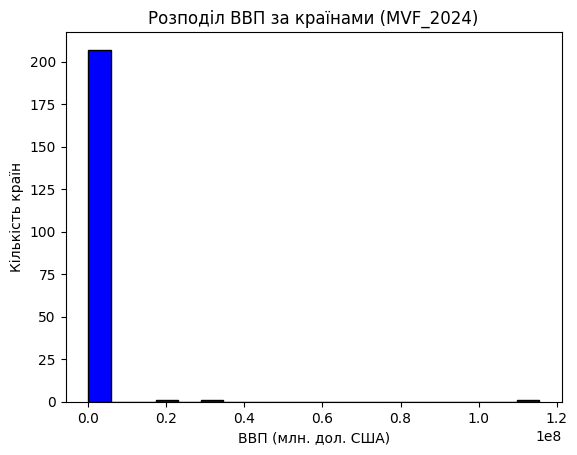

In [ ]:
# 15. Будую гістограми
print("Завдання 15: Будую гістограму для ВВП (MVF 2024)...")
plt.hist(df['MVF_2024_Forecast'], bins=20, color='blue', edgecolor='black')
plt.xlabel("ВВП (млн. дол. США)")
plt.ylabel("Кількість країн")
plt.title("Розподіл ВВП за країнами (MVF_2024)")
plt.show()

In [ ]:
# 16. Частка кожної країни у загальному ВВП
df['Share_MVF_2024'] = df['MVF_2024_Forecast'] / df['MVF_2024_Forecast'].sum() * 100
print("Завдання 16: Частка кожної країни у загальному ВВП (MVF 2024):")
print(df[['Country', 'Share_MVF_2024']].nlargest(5, 'Share_MVF_2024'))

Завдання 16: Частка кожної країни у загальному ВВП (MVF 2024):
         Country  Share_MVF_2024
0          World       46.419392
1  United States       12.193428
2          China        7.851493
3        Germany        1.978247
4          Japan        1.764426


Завдання 17: Візуалізую зміни ВВП за три роки для кожної країни...


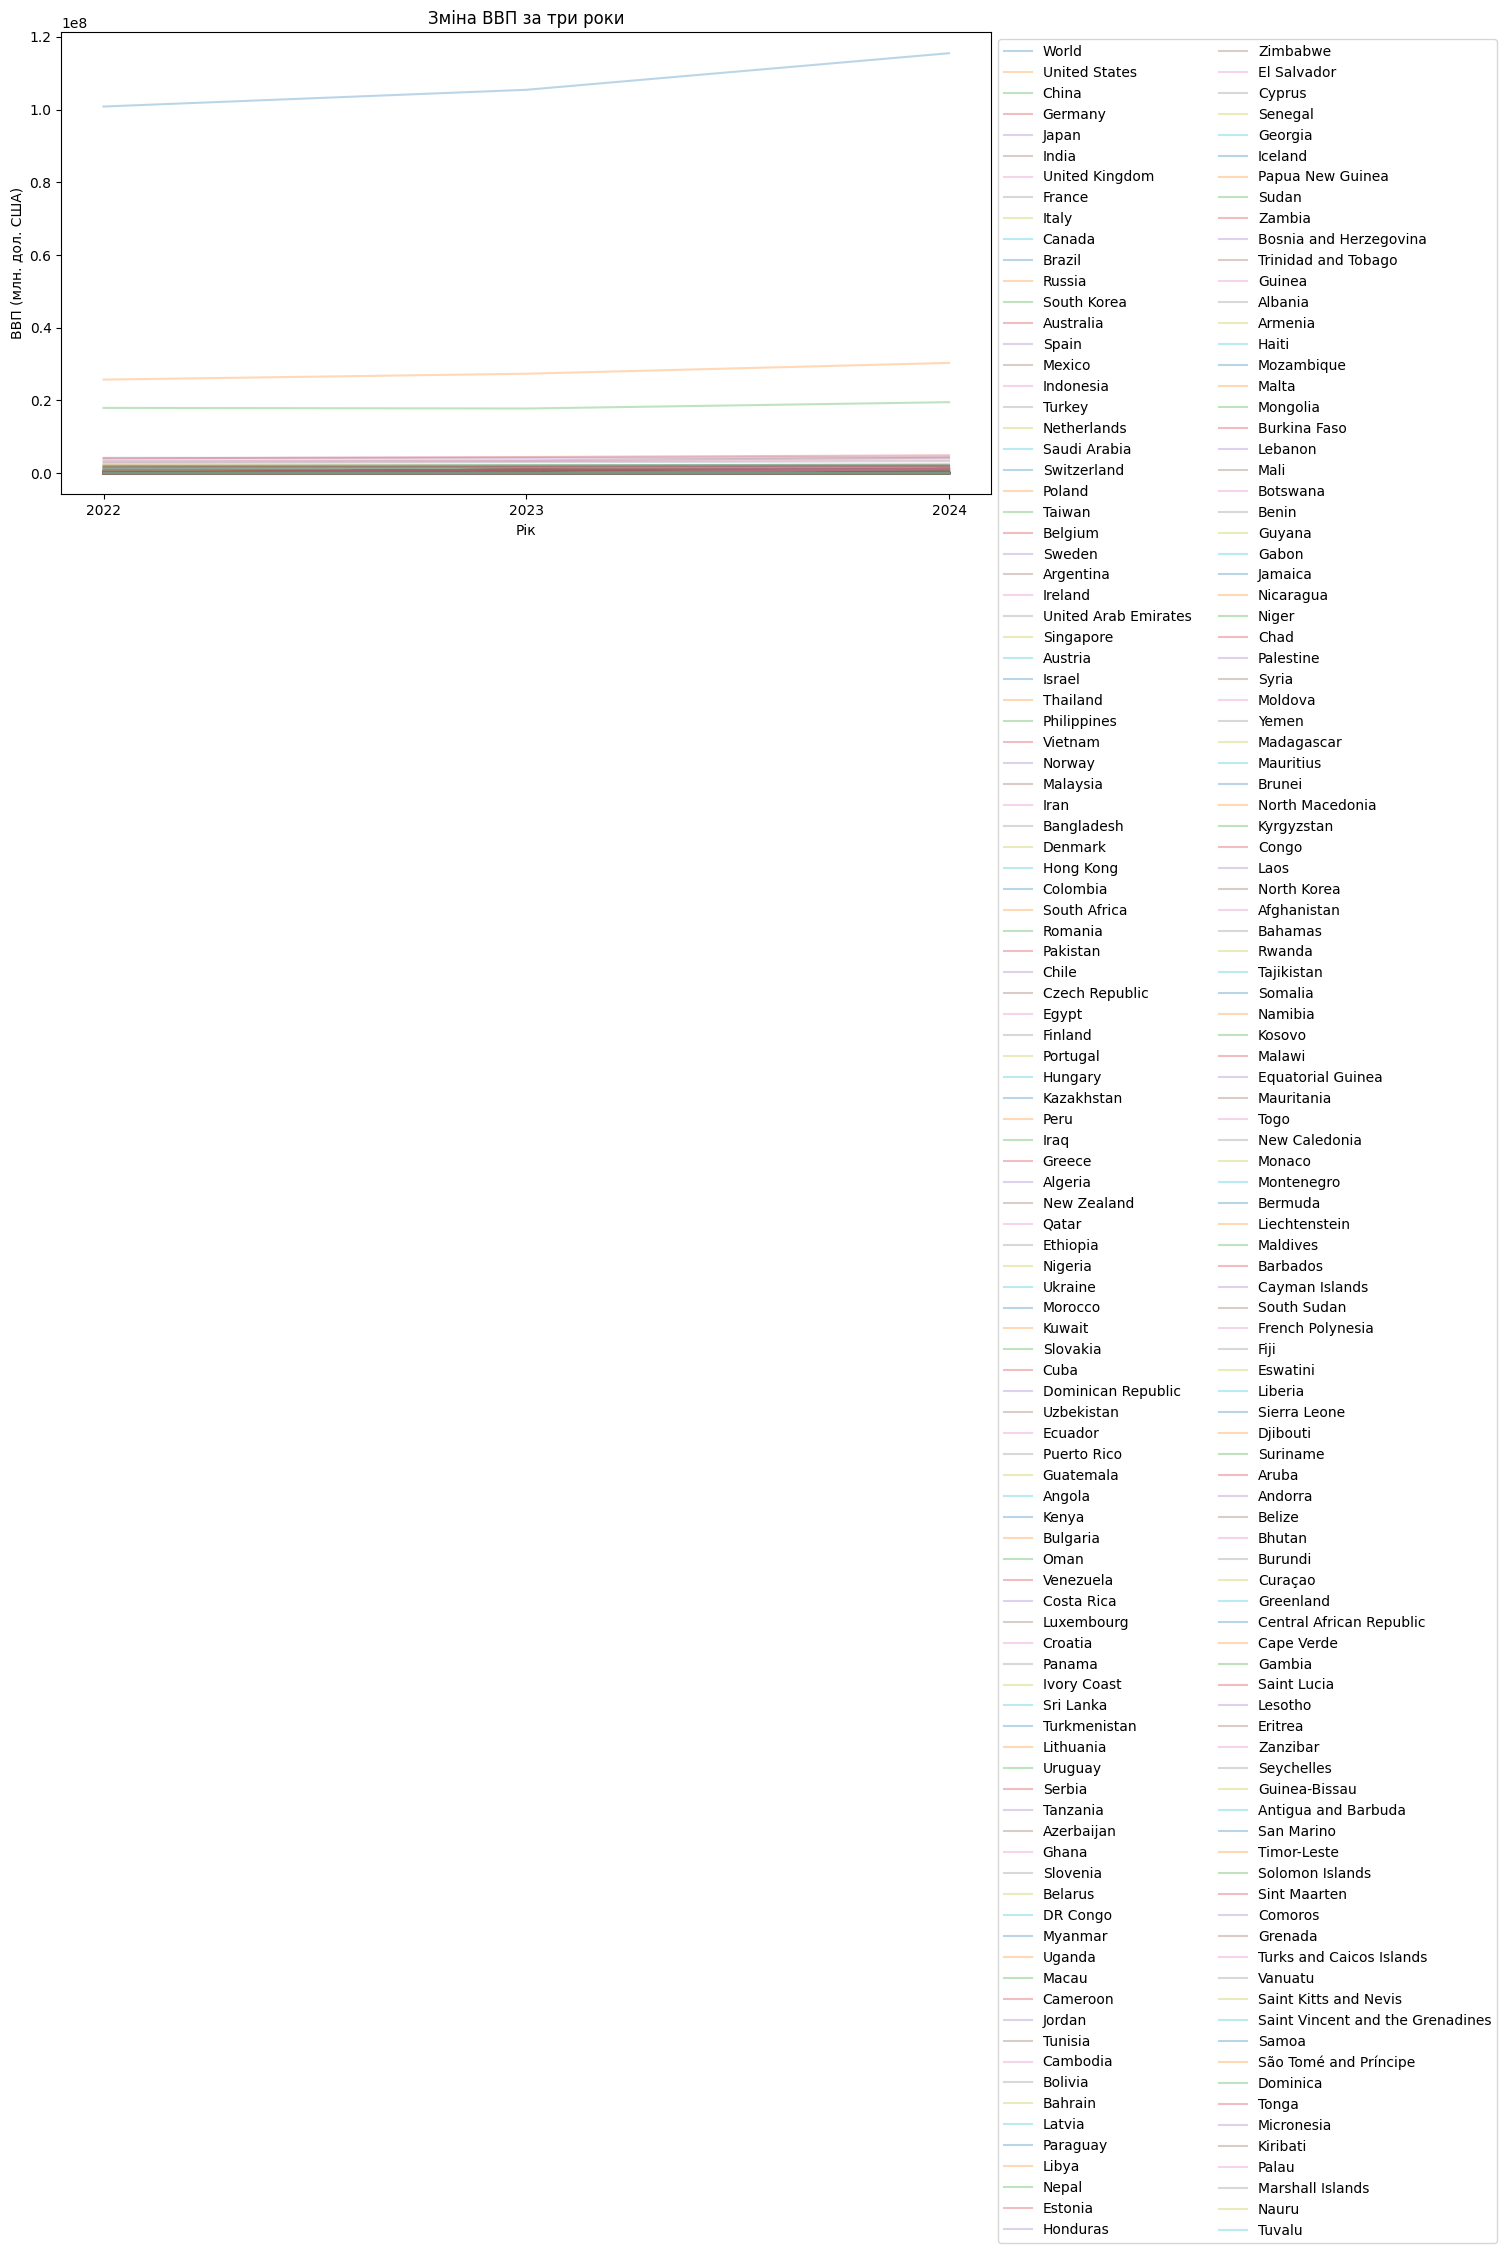

In [ ]:
# 17. Візуалізую зміни показників по роках
print("Завдання 17: Візуалізую зміни ВВП за три роки для кожної країни...")
plt.figure(figsize=(12, 6))
for index, row in df.iterrows():
    plt.plot(['2022', '2023', '2024'], [row['OON_2022_Estimate'], row['WorldBank_2023_Estimate'], row['MVF_2024_Forecast']], label=row['Country'], alpha=0.3)

plt.xlabel("Рік")
plt.ylabel("ВВП (млн. дол. США)")
plt.title("Зміна ВВП за три роки")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2)
plt.show()